2. Classify CIFAR-10 data set using MLP classifier. Perform the following

In [2]:
import numpy as np

from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [4]:
print("Shape of training data:")
print(X_train.shape)
print(y_train.shape)
print("Shape of test data:")
print(X_test.shape)
print(y_test.shape)

Shape of training data:
(50000, 32, 32, 3)
(50000, 1)
Shape of test data:
(10000, 32, 32, 3)
(10000, 1)


Example training images and their labels: [6, 9, 9, 4, 1]
Corresponding classes for the labels: ['frog', 'truck', 'truck', 'deer', 'automobile']


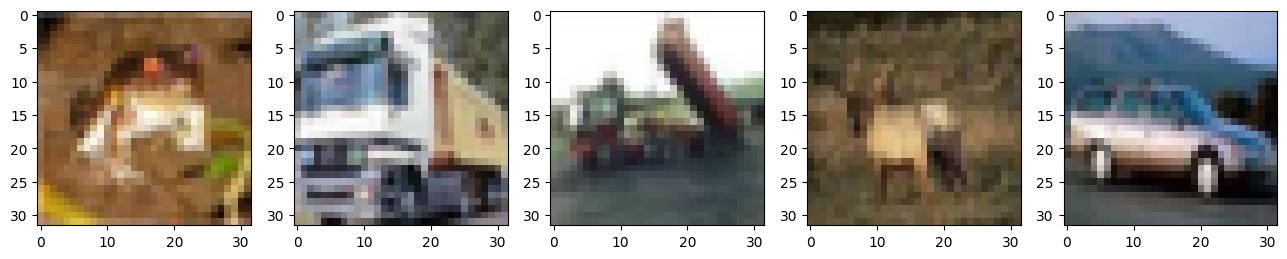

In [5]:
import matplotlib.pyplot as plt

cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print('Example training images and their labels: ' + str([x[0] for x in y_train[0:5]]))
print('Corresponding classes for the labels: ' + str([cifar_classes[x[0]] for x in y_train[0:5]]))

f, axarr = plt.subplots(1, 5)
f.set_size_inches(16, 6)

for i in range(5):
    img = X_train[i]
    axarr[i].imshow(img)
plt.show()

In [6]:
# Transform label indices to one-hot encoded vectors

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Transform images from (32,32,3) to 3072-dimensional vectors (32*32*3)

X_train = np.reshape(X_train,(50000,3072))
X_test = np.reshape(X_test,(10000,3072))
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalization of pixel values (to [0-1] range)

X_train /= 255
X_test /= 255

In [104]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(256, activation='relu', input_dim=3072))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [105]:
# Training the MLP

history = model.fit(X_train,y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.2)

Epoch 1/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.9298 - accuracy: 0.3013 - val_loss: 1.8114 - val_accuracy: 0.3436
Epoch 2/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.7265 - accuracy: 0.3785 - val_loss: 1.6693 - val_accuracy: 0.4104
Epoch 3/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.6485 - accuracy: 0.4117 - val_loss: 1.6954 - val_accuracy: 0.4002
Epoch 4/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.6038 - accuracy: 0.4272 - val_loss: 1.6875 - val_accuracy: 0.4029
Epoch 5/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.5783 - accuracy: 0.4402 - val_loss: 1.6362 - val_accuracy: 0.4262
Epoch 6/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5582 - accuracy: 0.4474 - val_loss: 1.6382 - val_accuracy: 0.4255
Epoch 7/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.5449 - accuracy: 0.4547 - val_loss: 1.6838 - val_accuracy:

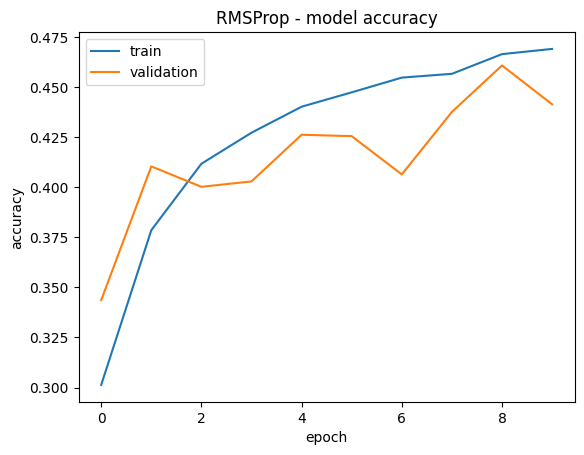

In [109]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('RMSProp - model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [107]:
# Evaluating the MLP
score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)

In [108]:
print(model.metrics_names)
print(score)

['loss', 'accuracy']
[1.6001778841018677, 0.448199987411499]


SGD, accuracy = 49.07
AdaGrad, accuracy = 42.68
Adam, accuracy = 46.32
RmsProp, accuracy = 44.81